### Machine Learning Project - By Vishnupriya Venkateswaran
##### Yelp Data Star Rating Prediction For Restaurants
##### 11-27-2018

In [1]:
#Importing necessary Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data- Yelp Academic data from Kaggle

### - Link of Yelp Dataset: https://www.kaggle.com/yelp-dataset/yelp-dataset

In [2]:
#Importing datasets
#The raw data was in json format so converted the json files to csv using python

#Dataset 1 : Contains all information about differnt businesses on Yelp

df_business = pd.read_csv('Raw_Data/CSV_DataFiles/business.csv')
df_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,NaN,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'..."
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,NaN,NaN,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0..."
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montr├йal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': ""{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
3,bFzdJJ3wp3PZssNEsyU23g,Geico Insurance,NaN,211 W Monroe St,Phoenix,AZ,85003,33.449999,-112.076979,1.5,8,1,NaN,"Insurance, Financial Services",NaN
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,NaN,2005 Alyth Place SE,Calgary,AB,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Nurseries & Gardening, Shopping...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


In [3]:
#Dataset 2: COntains all user check_in information
df_checkin = pd.read_csv('Raw_Data/CSV_DataFiles/checkin.csv')
df_checkin.head()

,time,business_id
0,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ...",7KPBkxAOEtb3QeIL9PEErg
1,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1...",kREVIrSBbtqBhIYkTccQUg
2,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'...",tJRDll5yqpZwehenzE2cSg
3,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",tZccfdl6JNw-j5BKnCTIQQ
4,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23...",r1p7RAMzCV_6NPF0dNoR3g


### Now that all the data are loaded, time for some Exploratory Data Analysis to understand more about the data



In [4]:
#Businesses on Yelp

df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
business_id     188593 non-null object
name            188593 non-null object
neighborhood    68655 non-null object
address         180970 non-null object
city            188583 non-null object
state           188593 non-null object
postal_code     187912 non-null object
latitude        188587 non-null float64
longitude       188587 non-null float64
stars           188593 non-null float64
review_count    188593 non-null int64
is_open         188593 non-null int64
attributes      162807 non-null object
categories      188052 non-null object
hours           143791 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


In [5]:
#To get rid of black spaces and NaN values

df_business =df_business.fillna(0)
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
business_id     188593 non-null object
name            188593 non-null object
neighborhood    188593 non-null object
address         188593 non-null object
city            188593 non-null object
state           188593 non-null object
postal_code     188593 non-null object
latitude        188593 non-null float64
longitude       188593 non-null float64
stars           188593 non-null float64
review_count    188593 non-null int64
is_open         188593 non-null int64
attributes      188593 non-null object
categories      188593 non-null object
hours           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


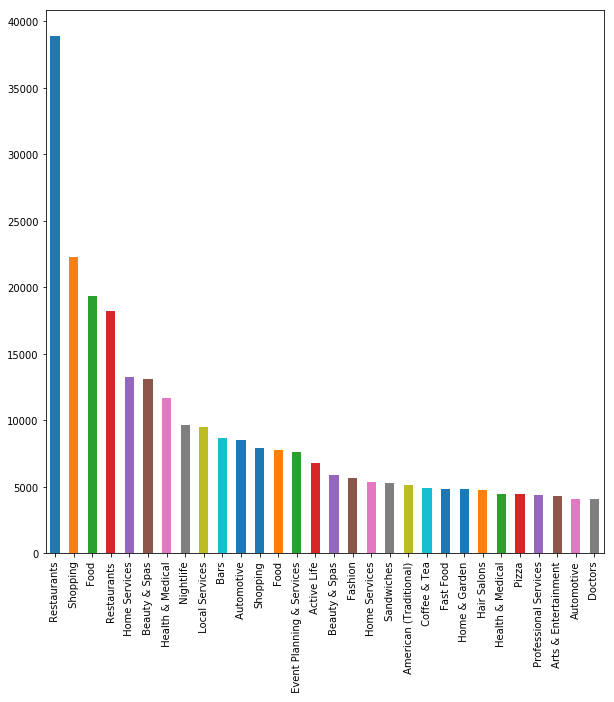

In [6]:
#1.differnt types of business categories and the number of businesses

category_dict = {}
for i in df_business.categories:
    cat = str(i).split(',')
    for j in cat:
        if j not in category_dict.keys():
            category_dict[j] = 1
        else:
            category_dict[j] += 1
uniq_cat_series = pd.Series(category_dict)
uniq_cat_series.sort_values(ascending = False, inplace = True)
uniq_cat_series[:30].plot(kind = 'bar',figsize=(10, 10))

#Restaurants are the largest category of business

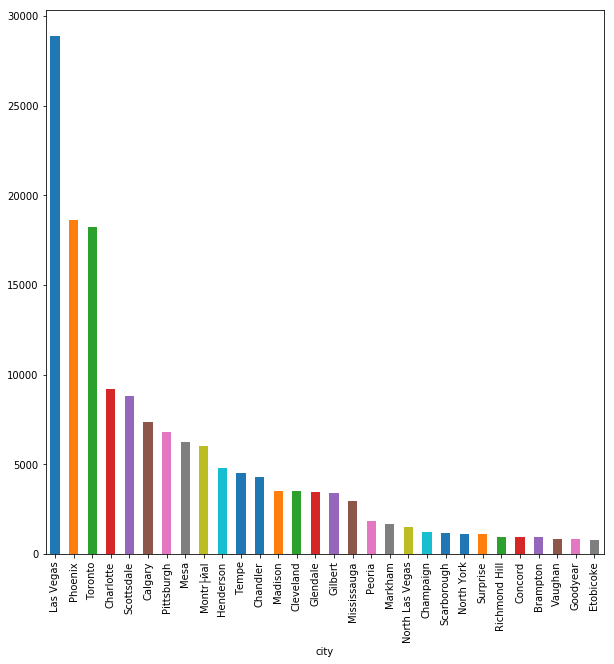

In [7]:
#2.Number of Businesses in each city

df_business_groups = df_business.groupby('city').count()
df_business_city = df_business_groups['name']
df_business_city_sorted = df_business_city.sort_values(ascending = False)
df_business_city_sorted[:30].plot(kind = 'bar',figsize=(10, 10))

#Las Vegas has the highest number of business rated on yelp.

In [8]:
#Describing all numeric data 
df_business.describe()

,latitude,longitude,stars,review_count,is_open
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,38.505568,-97.487772,3.631550,31.797310,0.830391
std,5.127205,17.701622,1.016783,104.124212,0.375290
min,-71.753941,-180.000000,1.000000,3.000000,0.000000
25%,33.630846,-112.279267,3.000000,4.000000,1.000000
50%,36.143591,-111.777190,3.500000,9.000000,1.000000
75%,43.593106,-79.982898,4.500000,24.000000,1.000000
max,85.051129,115.086769,5.000000,7968.000000,1.000000


In [9]:
#Since stars is my target feature, I want to learn more about it

#Correlation of star ratings with other variables
stars = df_business.groupby('stars').mean()
stars.corr()

,latitude,longitude,review_count,is_open
latitude,1.000000,0.998840,0.417108,-0.848070
longitude,0.998840,1.000000,0.430075,-0.847895
review_count,0.417108,0.430075,1.000000,-0.565628
is_open,-0.848070,-0.847895,-0.565628,1.000000


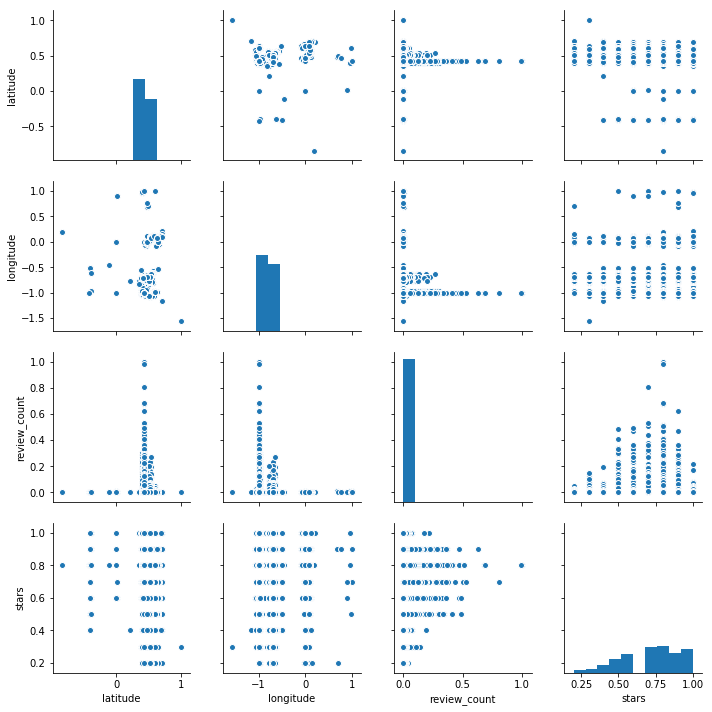

In [10]:
#To visually represent the correlation between differnt fields
#Data is normalized

import seaborn as sns
numeric_features = df_business.loc[:, ['latitude', 'longitude', 'review_count', 'stars']]
numeric_features_standardized = (numeric_features)/numeric_features.max()
ax = sns.pairplot(numeric_features_standardized)
plt.show()

In [11]:
#Checkin data gives the count of user check-ins for every businesses
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157075 entries, 0 to 157074
Data columns (total 2 columns):
time           157075 non-null object
business_id    157075 non-null object
dtypes: object(2)
memory usage: 2.4+ MB


In [12]:
#To get checkin count in the check_in data

df_checkin['time'] = df_checkin['time'].str.strip('{').str.strip('}').str.split(',')
df_checkin['time'].head(5)

0    ['Fri-0': 2,  'Sat-0': 1,  'Sun-0': 1,  'Wed-0...
1    ['Mon-13': 1,  'Thu-13': 1,  'Sat-16': 1,  'We...
2    ['Thu-0': 1,  'Mon-1': 1,  'Mon-12': 1,  'Sat-...
3            ['Sun-14': 1,  'Fri-18': 1,  'Mon-20': 1]
4    ['Sat-3': 1,  'Sun-18': 1,  'Sat-21': 1,  'Sat...
Name: time, dtype: object

In [13]:
#Now to get the check_in count for each business

count = []
for i in df_checkin['time']:
    a= []
    for j in i:
         a.append(int(j.split(':')[1]))
    count.append(sum(a))

#Adding the calculated check_in count to the dataframe

df_checkin['checkin_count'] = count
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157075 entries, 0 to 157074
Data columns (total 3 columns):
time             157075 non-null object
business_id      157075 non-null object
checkin_count    157075 non-null int64
dtypes: int64(1), object(2)
memory usage: 3.6+ MB


### For my project I will be considering the business and the check_in information to predict the star rating of businesses on yelp


In [14]:
#The first step before classification is to merge the business and check-in datasets to get a combined dataset.

df_new = df_business.merge(df_checkin, on=('business_id'))
df_new.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,time,checkin_count
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,0,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...","['Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1...",29
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,0,0,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",['Sun-1': 1],1
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montr├йal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': ""{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...","['Mon-0': 1, 'Sun-0': 1, 'Fri-1': 1, 'Sun-1...",7
3,bFzdJJ3wp3PZssNEsyU23g,Geico Insurance,0,211 W Monroe St,Phoenix,AZ,85003,33.449999,-112.076979,1.5,8,1,0,"Insurance, Financial Services",0,['Wed-18': 1],1
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,0,2005 Alyth Place SE,Calgary,AB,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Nurseries & Gardening, Shopping...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...","['Thu-14': 1, 'Thu-20': 1]",2


In [15]:
#Here my target is stars
#Therefore some infomation on stars

df_new["stars"].value_counts()

4.0    31975
3.5    29879
4.5    23718
3.0    22620
5.0    19714
2.5    14680
2.0     8649
1.5     3706
1.0     2134
Name: stars, dtype: int64

In [16]:
#Since the values are in .5 we can round off to have star ratings from 1 to 4. 1 being the lowest and 4 being the highest

df_new['stars'] = df_new['stars'].round()
df_new["stars"].value_counts()

4.0    85572
2.0    27035
3.0    22620
5.0    19714
1.0     2134
Name: stars, dtype: int64

In [17]:
#Now to make all values in the dataset equal
df_new['review_count'] = df_new['review_count'].fillna(0)
df_new['checkin_count'] = df_new['checkin_count'].fillna(0)

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157075 entries, 0 to 157074
Data columns (total 17 columns):
business_id      157075 non-null object
name             157075 non-null object
neighborhood     157075 non-null object
address          157075 non-null object
city             157075 non-null object
state            157075 non-null object
postal_code      157075 non-null object
latitude         157075 non-null float64
longitude        157075 non-null float64
stars            157075 non-null float64
review_count     157075 non-null int64
is_open          157075 non-null int64
attributes       157075 non-null object
categories       157075 non-null object
hours            157075 non-null object
time             157075 non-null object
checkin_count    157075 non-null int64
dtypes: float64(3), int64(3), object(11)
memory usage: 21.6+ MB


### Yelp has reviews for many types of businesses as seen in the graph above. For the scope of this project I will be using information on only restaurants.

In [19]:
#To filter only restuarants from the categories from the above dataframe.
df_new['categories']=df_new['categories'].tolist()

In [20]:
#Convert categories into list for to filter restaurants only combined dataset

#lenght is the length of datfram
length= df_new['categories'].count()

#create an empty list to store the values
test = []
#split the values and put it in the dataframe
for i in range(0,length):
     test.append(str(df_new['categories'][i]).split(','))


df_new['categories']=test        

In [21]:
df_new.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,time,checkin_count
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,0,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","[Tours, Breweries, Pizza, Restaurants, Foo...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...","['Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1...",29
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,0,0,Henderson,NV,89002,35.960734,-114.939821,4.0,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","[Chicken Wings, Burgers, Caterers, Street V...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",['Sun-1': 1],1
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montr├йal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': ""{'ro...","[Breakfast & Brunch, Restaurants, French, S...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...","['Mon-0': 1, 'Sun-0': 1, 'Fri-1': 1, 'Sun-1...",7
3,bFzdJJ3wp3PZssNEsyU23g,Geico Insurance,0,211 W Monroe St,Phoenix,AZ,85003,33.449999,-112.076979,2.0,8,1,0,"[Insurance, Financial Services]",0,['Wed-18': 1],1
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,0,2005 Alyth Place SE,Calgary,AB,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"[Home & Garden, Nurseries & Gardening, Shopp...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...","['Thu-14': 1, 'Thu-20': 1]",2


In [22]:
#Now fiter all the categories with restaurants
temp = []
i = 0
for category in df_new["categories"]:
    if 'Restaurants' in category:
        temp.append(i)
    i += 1  

#Now the data contains only information for restuarants
df_new.index.tolist()
restuarant_df = df_new.iloc[temp]
restuarant_df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,time,checkin_count
9,KapTdGyGs7RK0c68Z6hhhg,Sushi 8,Unionville,4568 Highway 7 E,Markham,ON,L3R 1M5,43.862484,-79.306960,2.0,12,0,"{'GoodForKids': 'True', 'NoiseLevel': 'loud', ...","[Restaurants, Japanese]","{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:...","['Mon-0': 1, 'Wed-12': 1, 'Sun-17': 1, 'Tue...",7
12,bBUMib8l6Me1ZB1_Qkezkg,Mysore Indian Cuisine,Plateau-Mont-Royal,4216 Saint-Laurent Boul,Montr├йal,QC,H2W 1Z3,45.518036,-73.582174,4.0,19,1,"{'Alcohol': 'full_bar', 'Ambience': ""{'romanti...","[Restaurants, Pakistani, Indian, Middle Eas...",0,"['Sat-0': 1, 'Sun-0': 1, 'Tue-0': 1, 'Sat-1...",22
23,PMDlKLd0Mxj0ngCpuUmE5Q,The Coffee Mill Restaurant,Yorkville,99 Yorkville Avenue,Toronto,ON,M5R 3K5,43.670885,-79.392379,4.0,25,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","[Restaurants, Food, Canadian (New), Coffee ...",0,"['Sat-0': 1, 'Sun-3': 1, 'Sat-14': 1, 'Wed-...",20
29,UeyHx5LMFjjI4d-NTYkX9Q,Crossroads Country Cafe',0,15916 W High St,Middlefield,OH,44062,41.462443,-81.074991,2.0,3,1,"{'Alcohol': 'none', 'Ambience': ""{'romantic': ...","[Restaurants, Cafes]","{'Monday': '5:30-14:0', 'Tuesday': '5:30-14:0'...","['Sat-15': 2, 'Sat-20': 1]",3
46,AYL_y8ahquUW0o-cvIyLbg,Junior's Pizzeria,0,2908 Oak Lake Blvd,Charlotte,NC,28208,35.190366,-80.922471,4.0,85,1,"{'Alcohol': 'none', 'Ambience': ""{'romantic': ...","[Restaurants, Pizza]",0,"['Sun-0': 2, 'Thu-0': 1, 'Wed-0': 2, 'Sun-1...",126


In [23]:
#Drop all the unwanted columns from the dataframe
restuarant_df = restuarant_df.drop(['name','address', 'postal_code','latitude','longitude','is_open','attributes','categories','hours','time'], axis=1)

In [24]:
restuarant_df.head()

,business_id,neighborhood,city,state,stars,review_count,checkin_count
9,KapTdGyGs7RK0c68Z6hhhg,Unionville,Markham,ON,2.0,12,7
12,bBUMib8l6Me1ZB1_Qkezkg,Plateau-Mont-Royal,Montr├йal,QC,4.0,19,22
23,PMDlKLd0Mxj0ngCpuUmE5Q,Yorkville,Toronto,ON,4.0,25,20
29,UeyHx5LMFjjI4d-NTYkX9Q,0,Middlefield,OH,2.0,3,3
46,AYL_y8ahquUW0o-cvIyLbg,0,Charlotte,NC,4.0,85,126


In [25]:
#The data is not normalized. So we normalize the non-numeric columns in the dataframe

#1.For neighborhood
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
restuarant_df['neighborhood'] = label_encoder.fit_transform(restuarant_df['neighborhood'].astype(str))
restuarant_df.head()

,business_id,neighborhood,city,state,stars,review_count,checkin_count
9,KapTdGyGs7RK0c68Z6hhhg,277,Markham,ON,2.0,12,7
12,bBUMib8l6Me1ZB1_Qkezkg,198,Montr├йal,QC,4.0,19,22
23,PMDlKLd0Mxj0ngCpuUmE5Q,310,Toronto,ON,4.0,25,20
29,UeyHx5LMFjjI4d-NTYkX9Q,0,Middlefield,OH,2.0,3,3
46,AYL_y8ahquUW0o-cvIyLbg,0,Charlotte,NC,4.0,85,126


In [26]:
#2.For city
label_encoder = preprocessing.LabelEncoder()
restuarant_df['city'] = label_encoder.fit_transform(restuarant_df['city'].astype(str))
restuarant_df.head()

,business_id,neighborhood,city,state,stars,review_count,checkin_count
9,KapTdGyGs7RK0c68Z6hhhg,277,236,ON,2.0,12,7
12,bBUMib8l6Me1ZB1_Qkezkg,198,283,QC,4.0,19,22
23,PMDlKLd0Mxj0ngCpuUmE5Q,310,483,ON,4.0,25,20
29,UeyHx5LMFjjI4d-NTYkX9Q,0,264,OH,2.0,3,3
46,AYL_y8ahquUW0o-cvIyLbg,0,83,NC,4.0,85,126


In [27]:
#3. For state
label_encoder = preprocessing.LabelEncoder()
restuarant_df['state'] = label_encoder.fit_transform(restuarant_df['state'])
restuarant_df.head()

,business_id,neighborhood,city,state,stars,review_count,checkin_count
9,KapTdGyGs7RK0c68Z6hhhg,277,236,21,2.0,12,7
12,bBUMib8l6Me1ZB1_Qkezkg,198,283,24,4.0,19,22
23,PMDlKLd0Mxj0ngCpuUmE5Q,310,483,21,4.0,25,20
29,UeyHx5LMFjjI4d-NTYkX9Q,0,264,20,2.0,3,3
46,AYL_y8ahquUW0o-cvIyLbg,0,83,13,4.0,85,126


In [28]:
#4.For checkin count and review count
columns_to_norm = ['review_count', 'checkin_count']
restuarant_df[columns_to_norm] = restuarant_df[columns_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
restuarant_df.head()

,business_id,neighborhood,city,state,stars,review_count,checkin_count
9,KapTdGyGs7RK0c68Z6hhhg,277,236,21,2.0,0.002124,0.000353
12,bBUMib8l6Me1ZB1_Qkezkg,198,283,24,4.0,0.003776,0.001237
23,PMDlKLd0Mxj0ngCpuUmE5Q,310,483,21,4.0,0.005192,0.001119
29,UeyHx5LMFjjI4d-NTYkX9Q,0,264,20,2.0,0.000000,0.000118
46,AYL_y8ahquUW0o-cvIyLbg,0,83,13,4.0,0.019353,0.007364


### Export the Restuarant dataframe to csv for building models

In [29]:
#Commenting the file generation so that it is non repetative.

#restuarant_df.to_csv('restaurants_data.csv', encoding='utf-8', index=False)


In [30]:
#The cleaned data can be used to build differnt models using machine learning techniques.